In [124]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags
from scipy.sparse.linalg import inv
import scipy as scp
%matplotlib notebook

### Theory and Derivation 

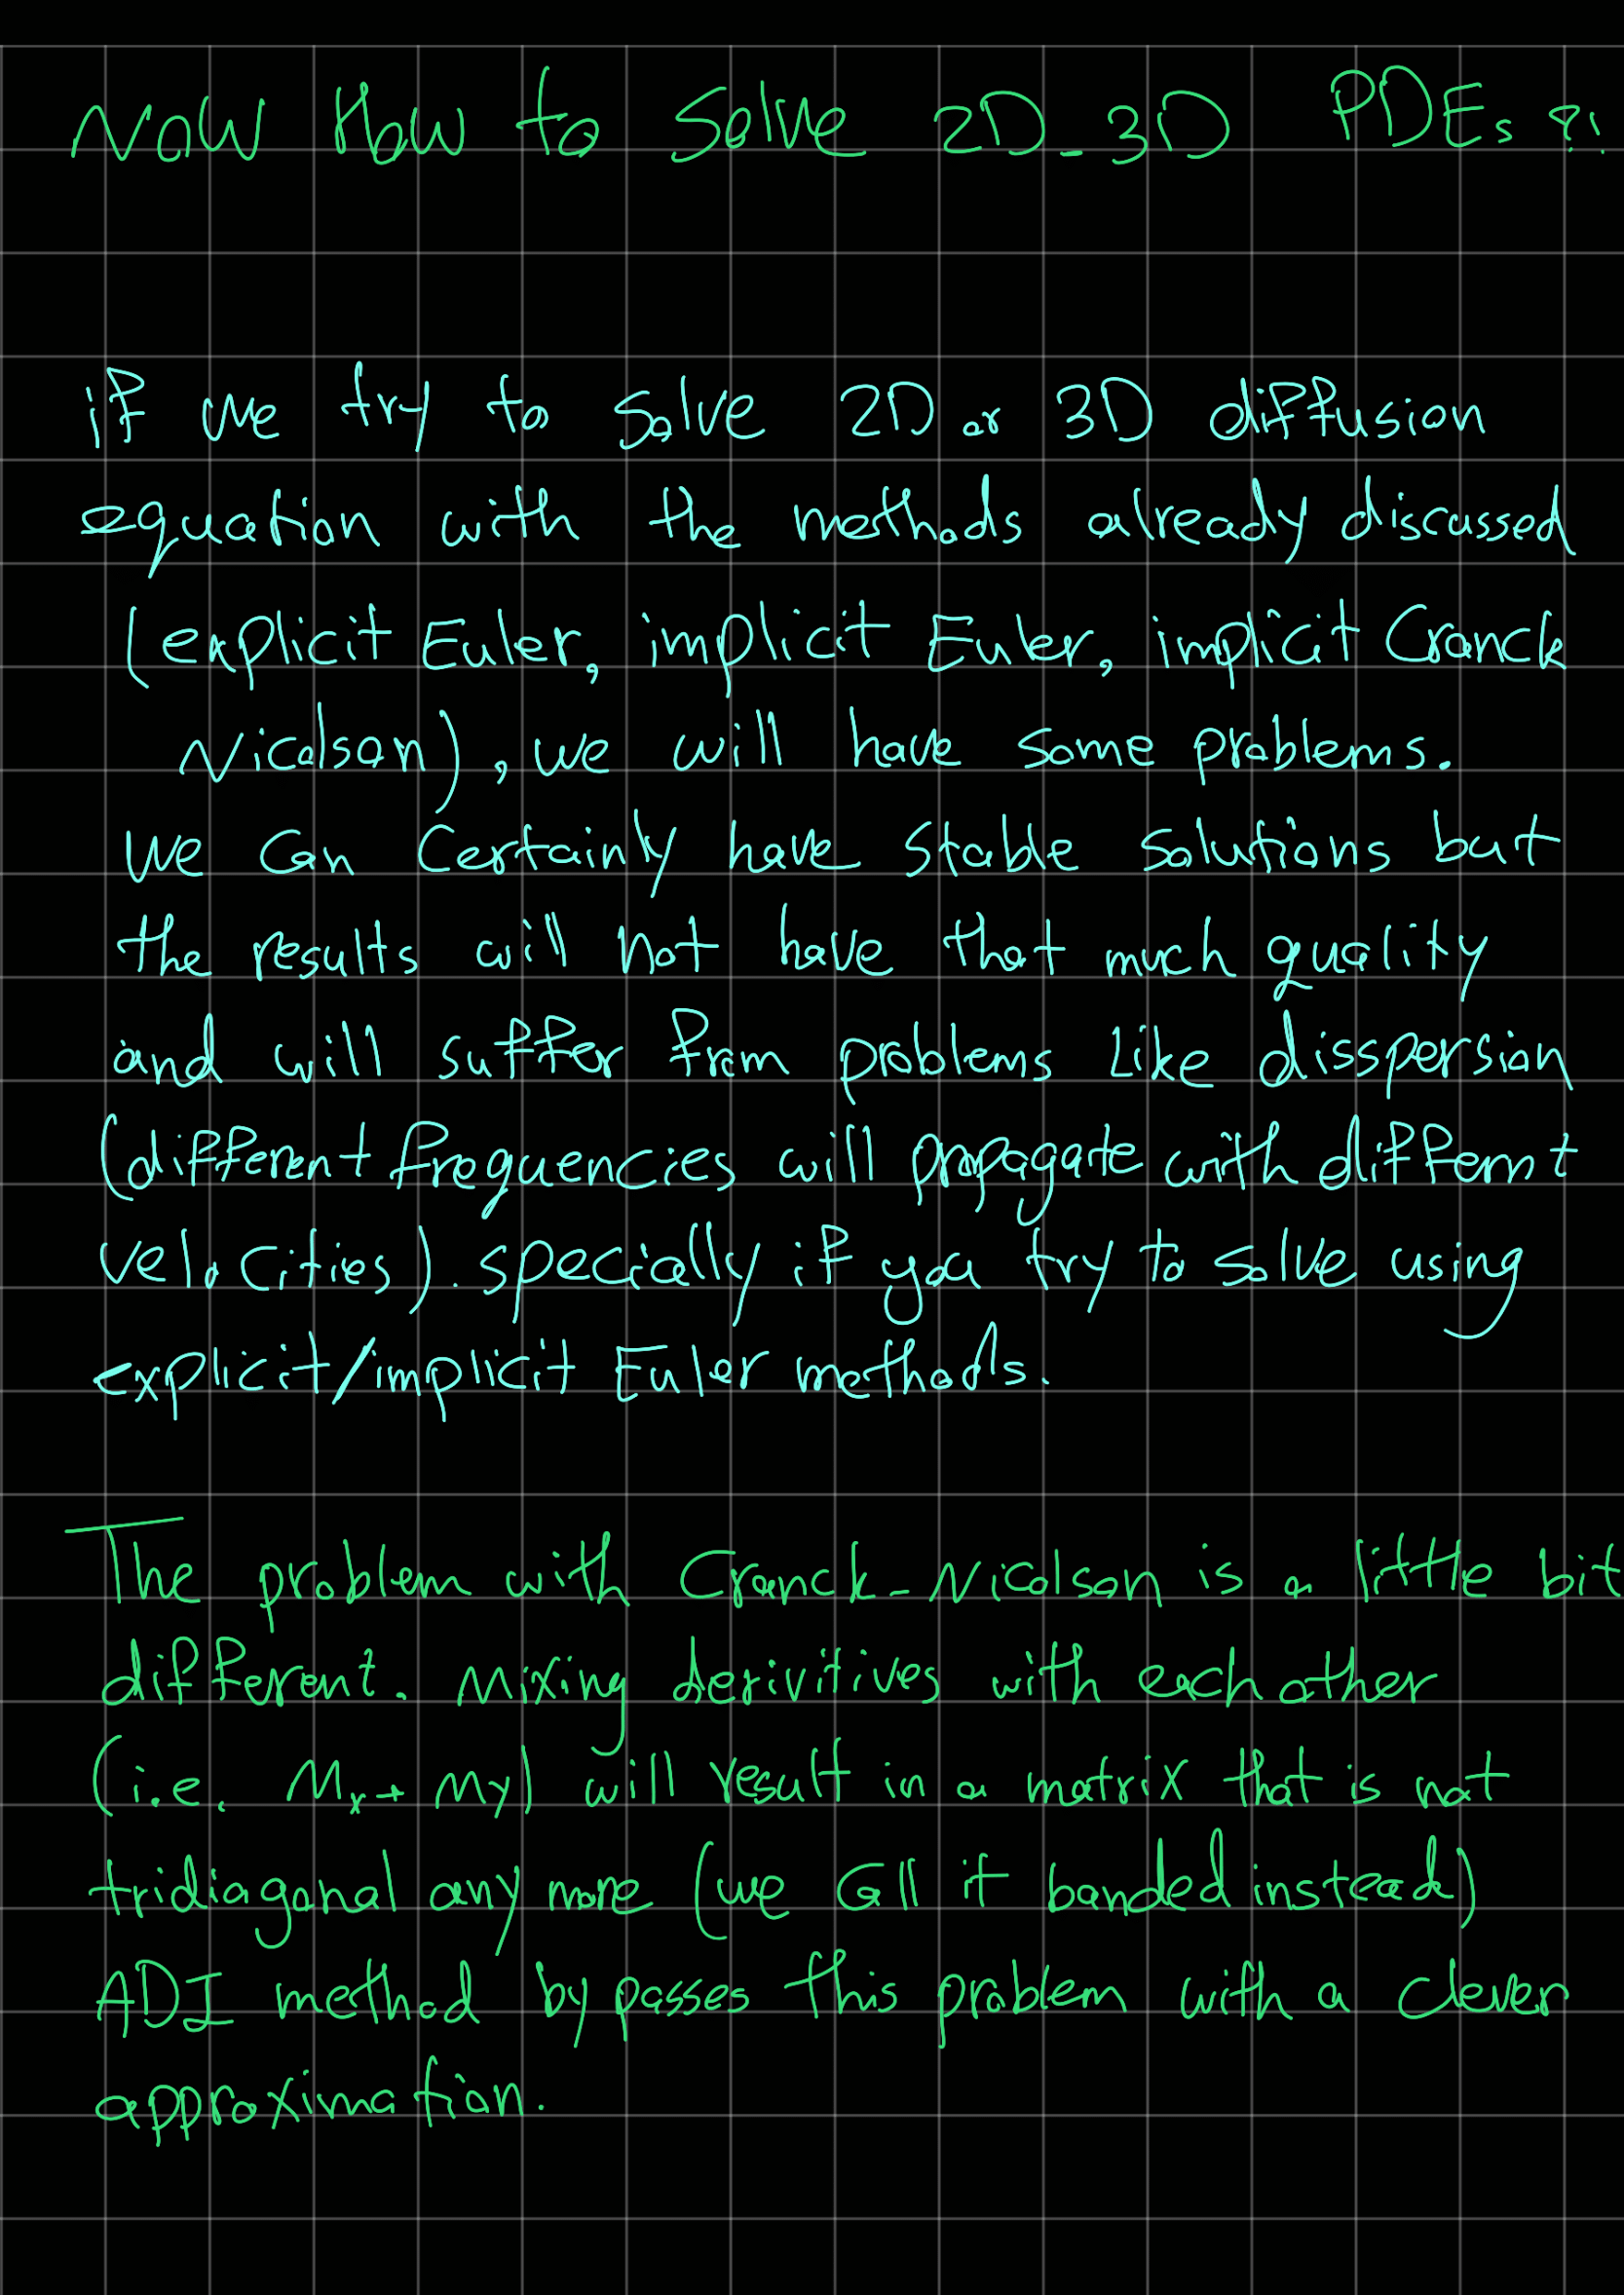

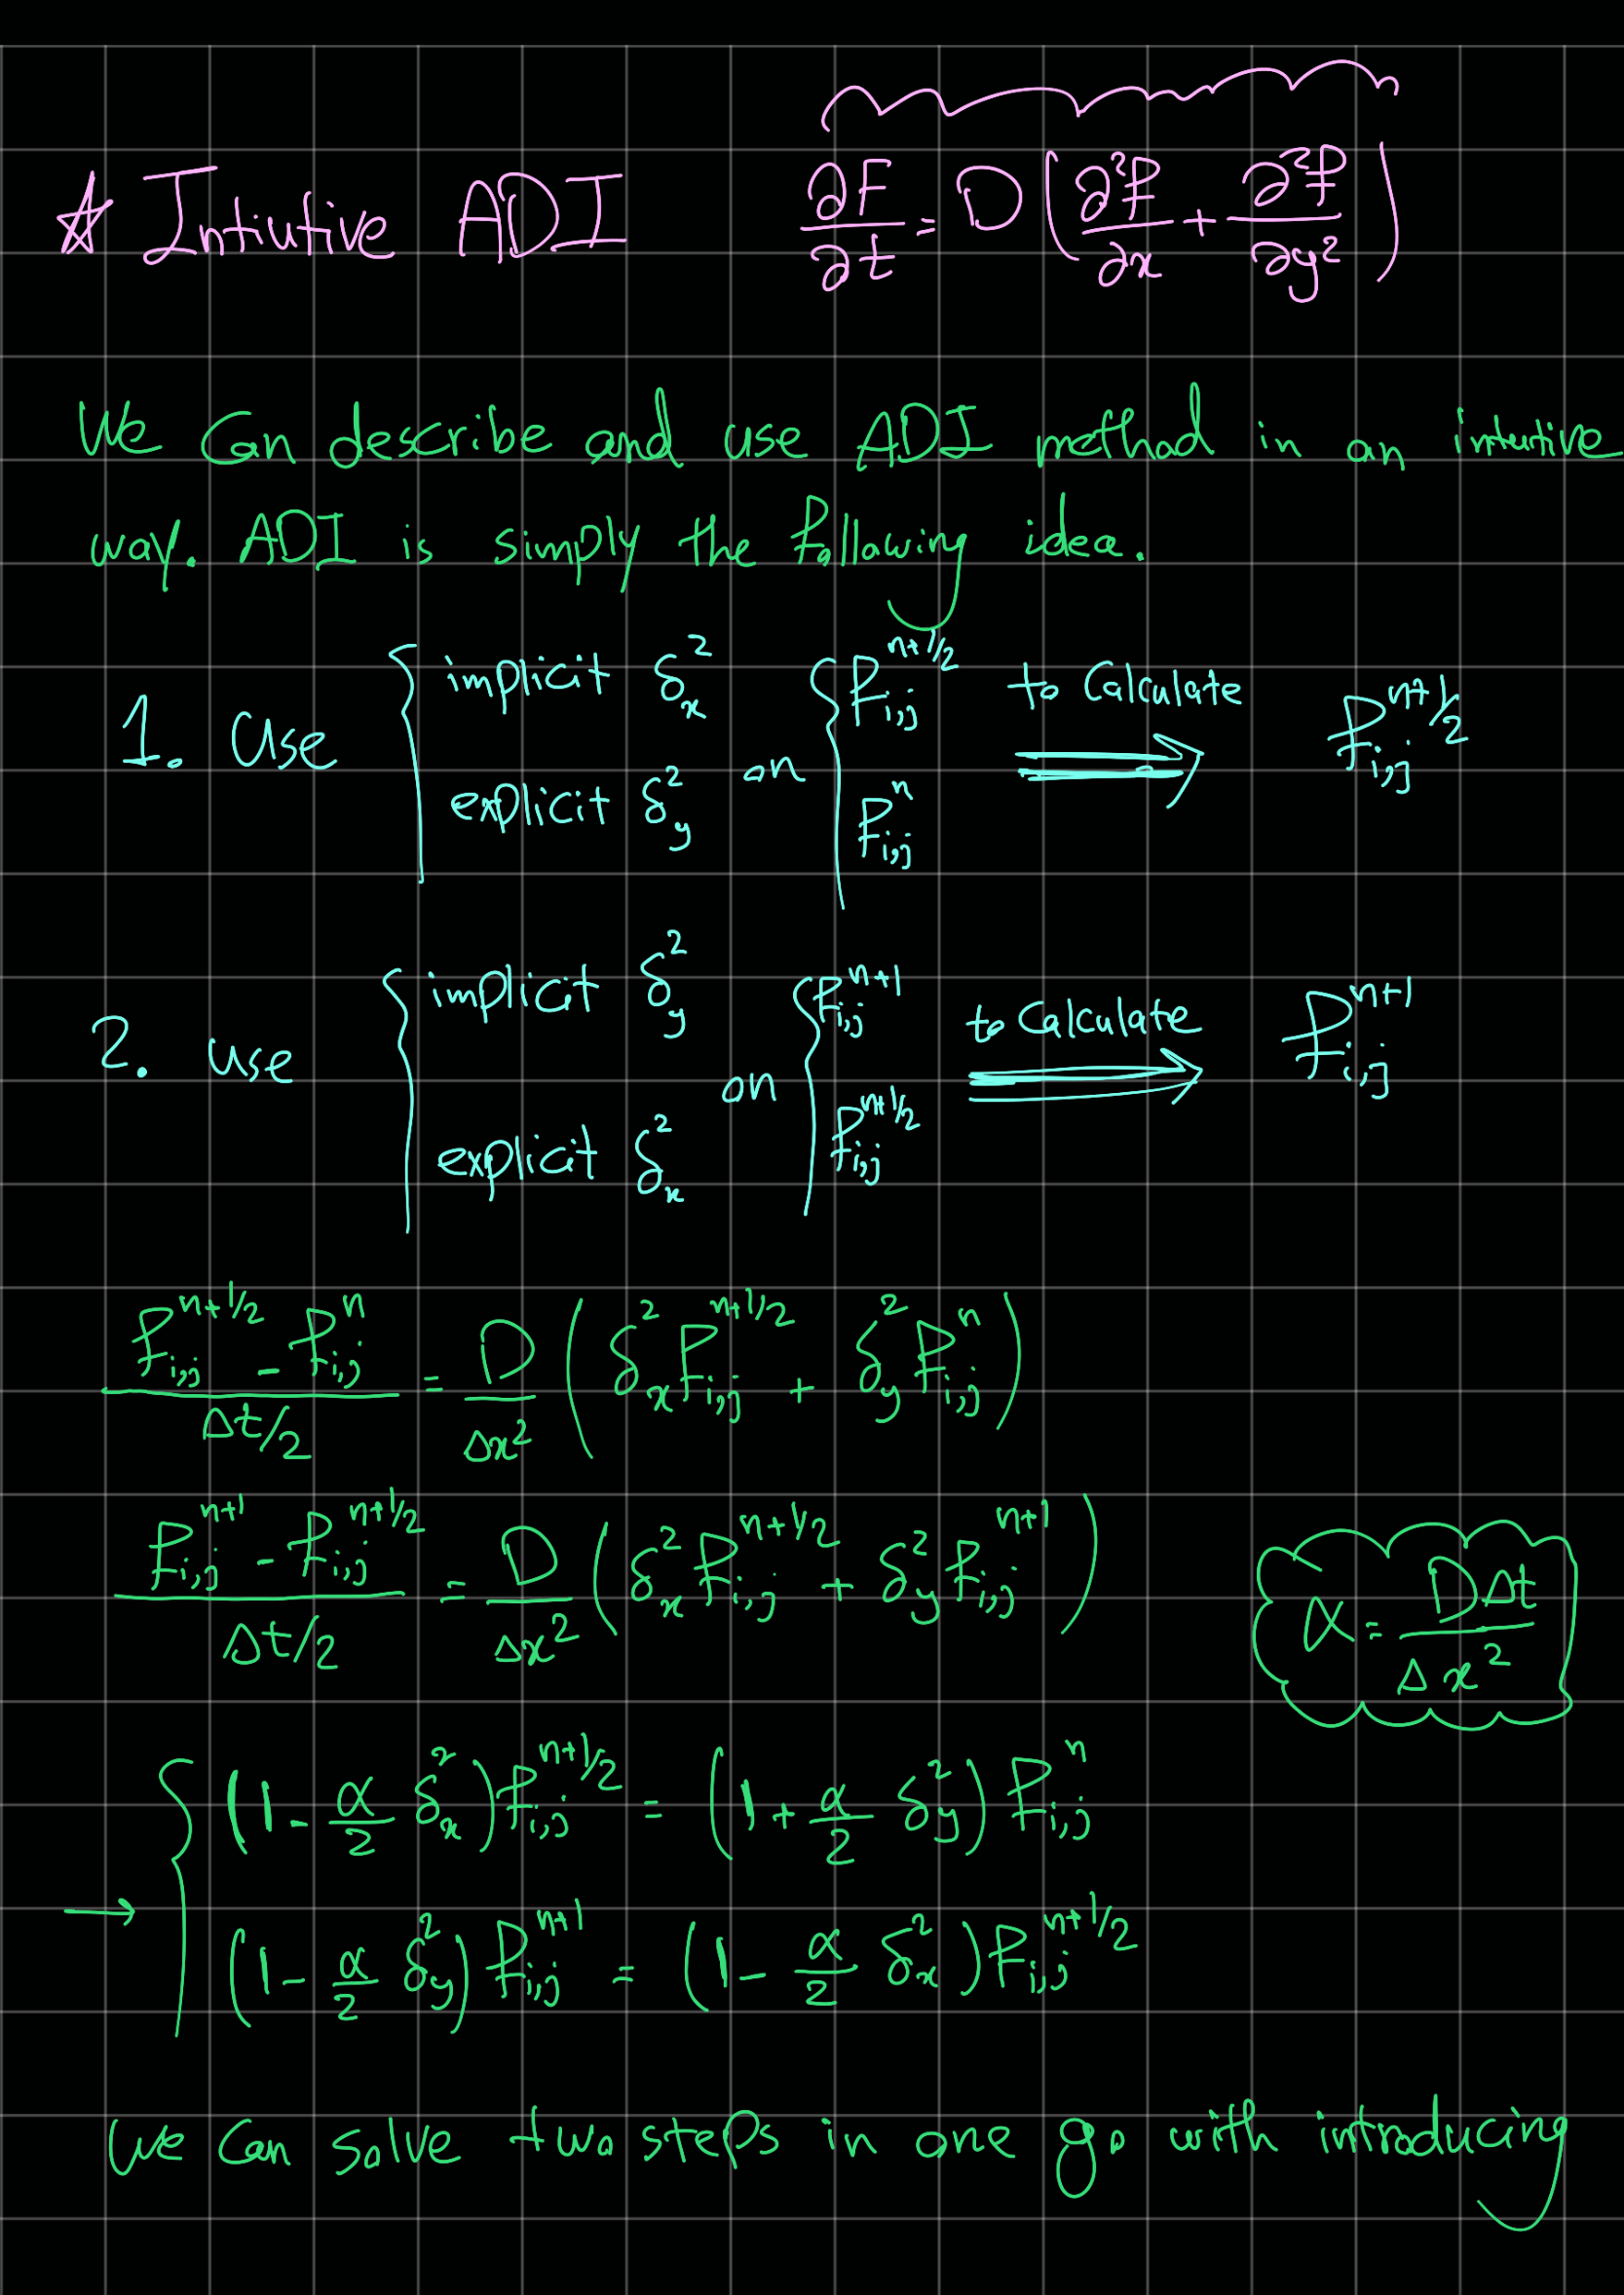

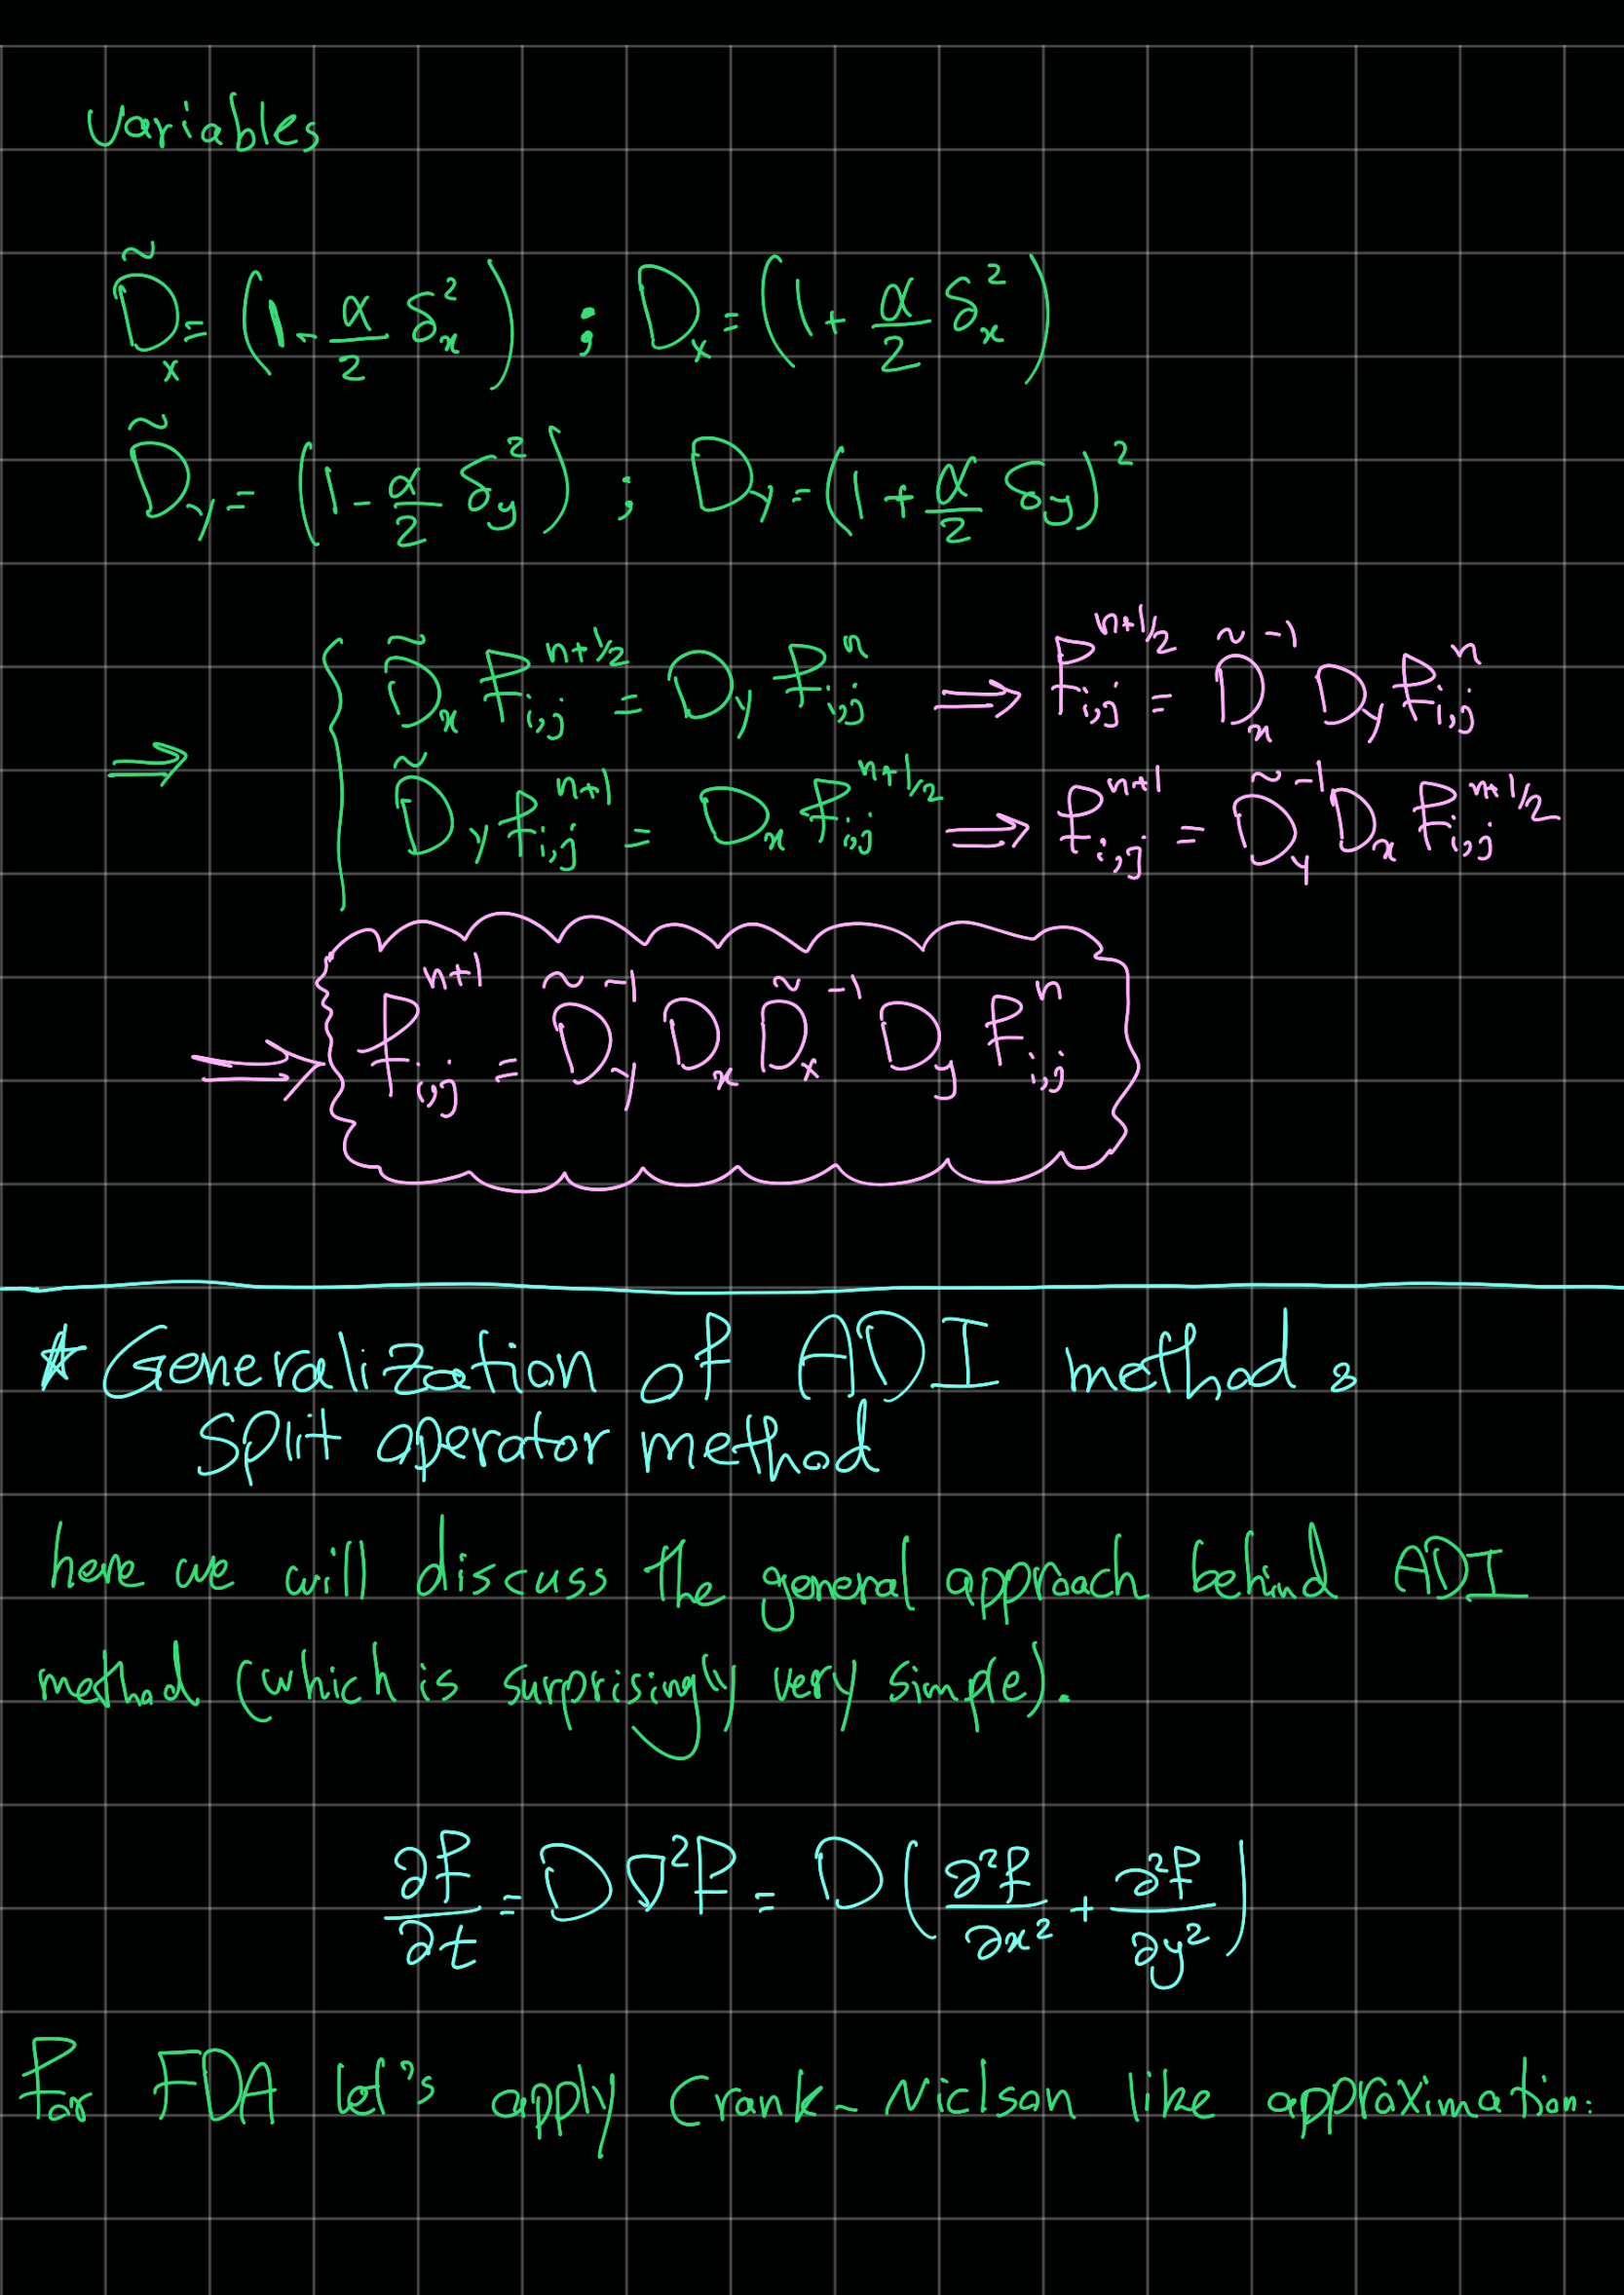

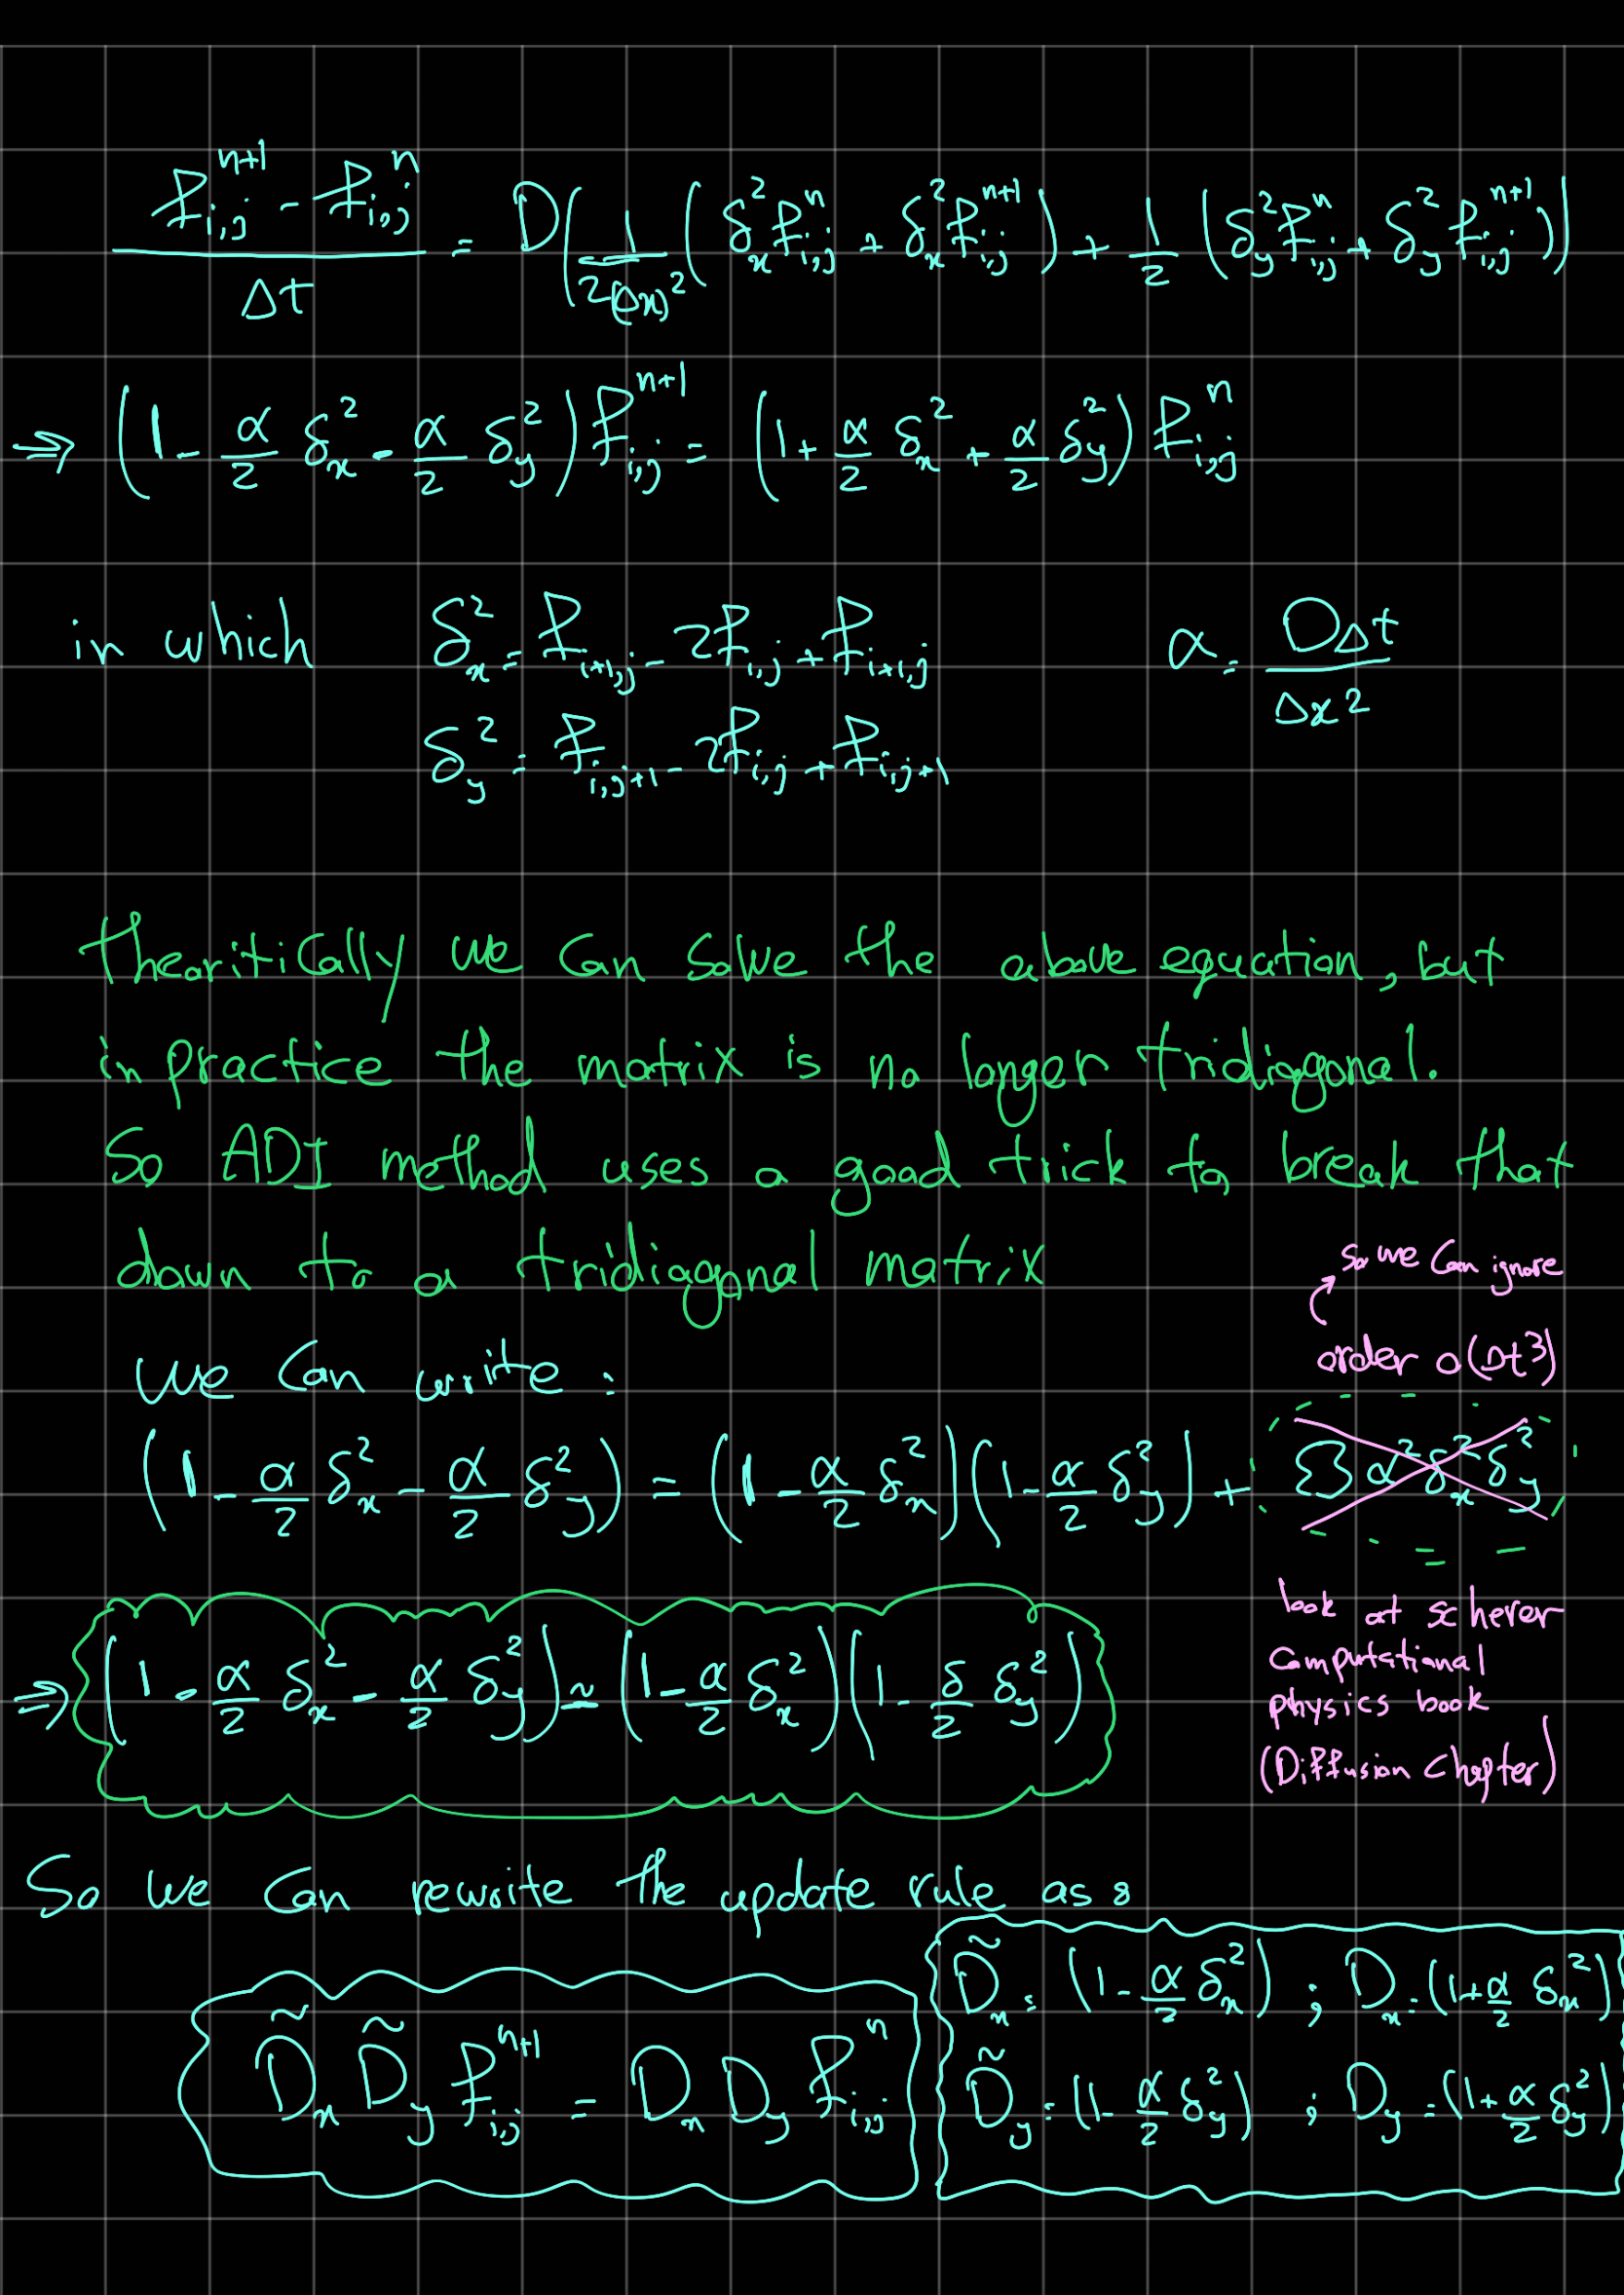

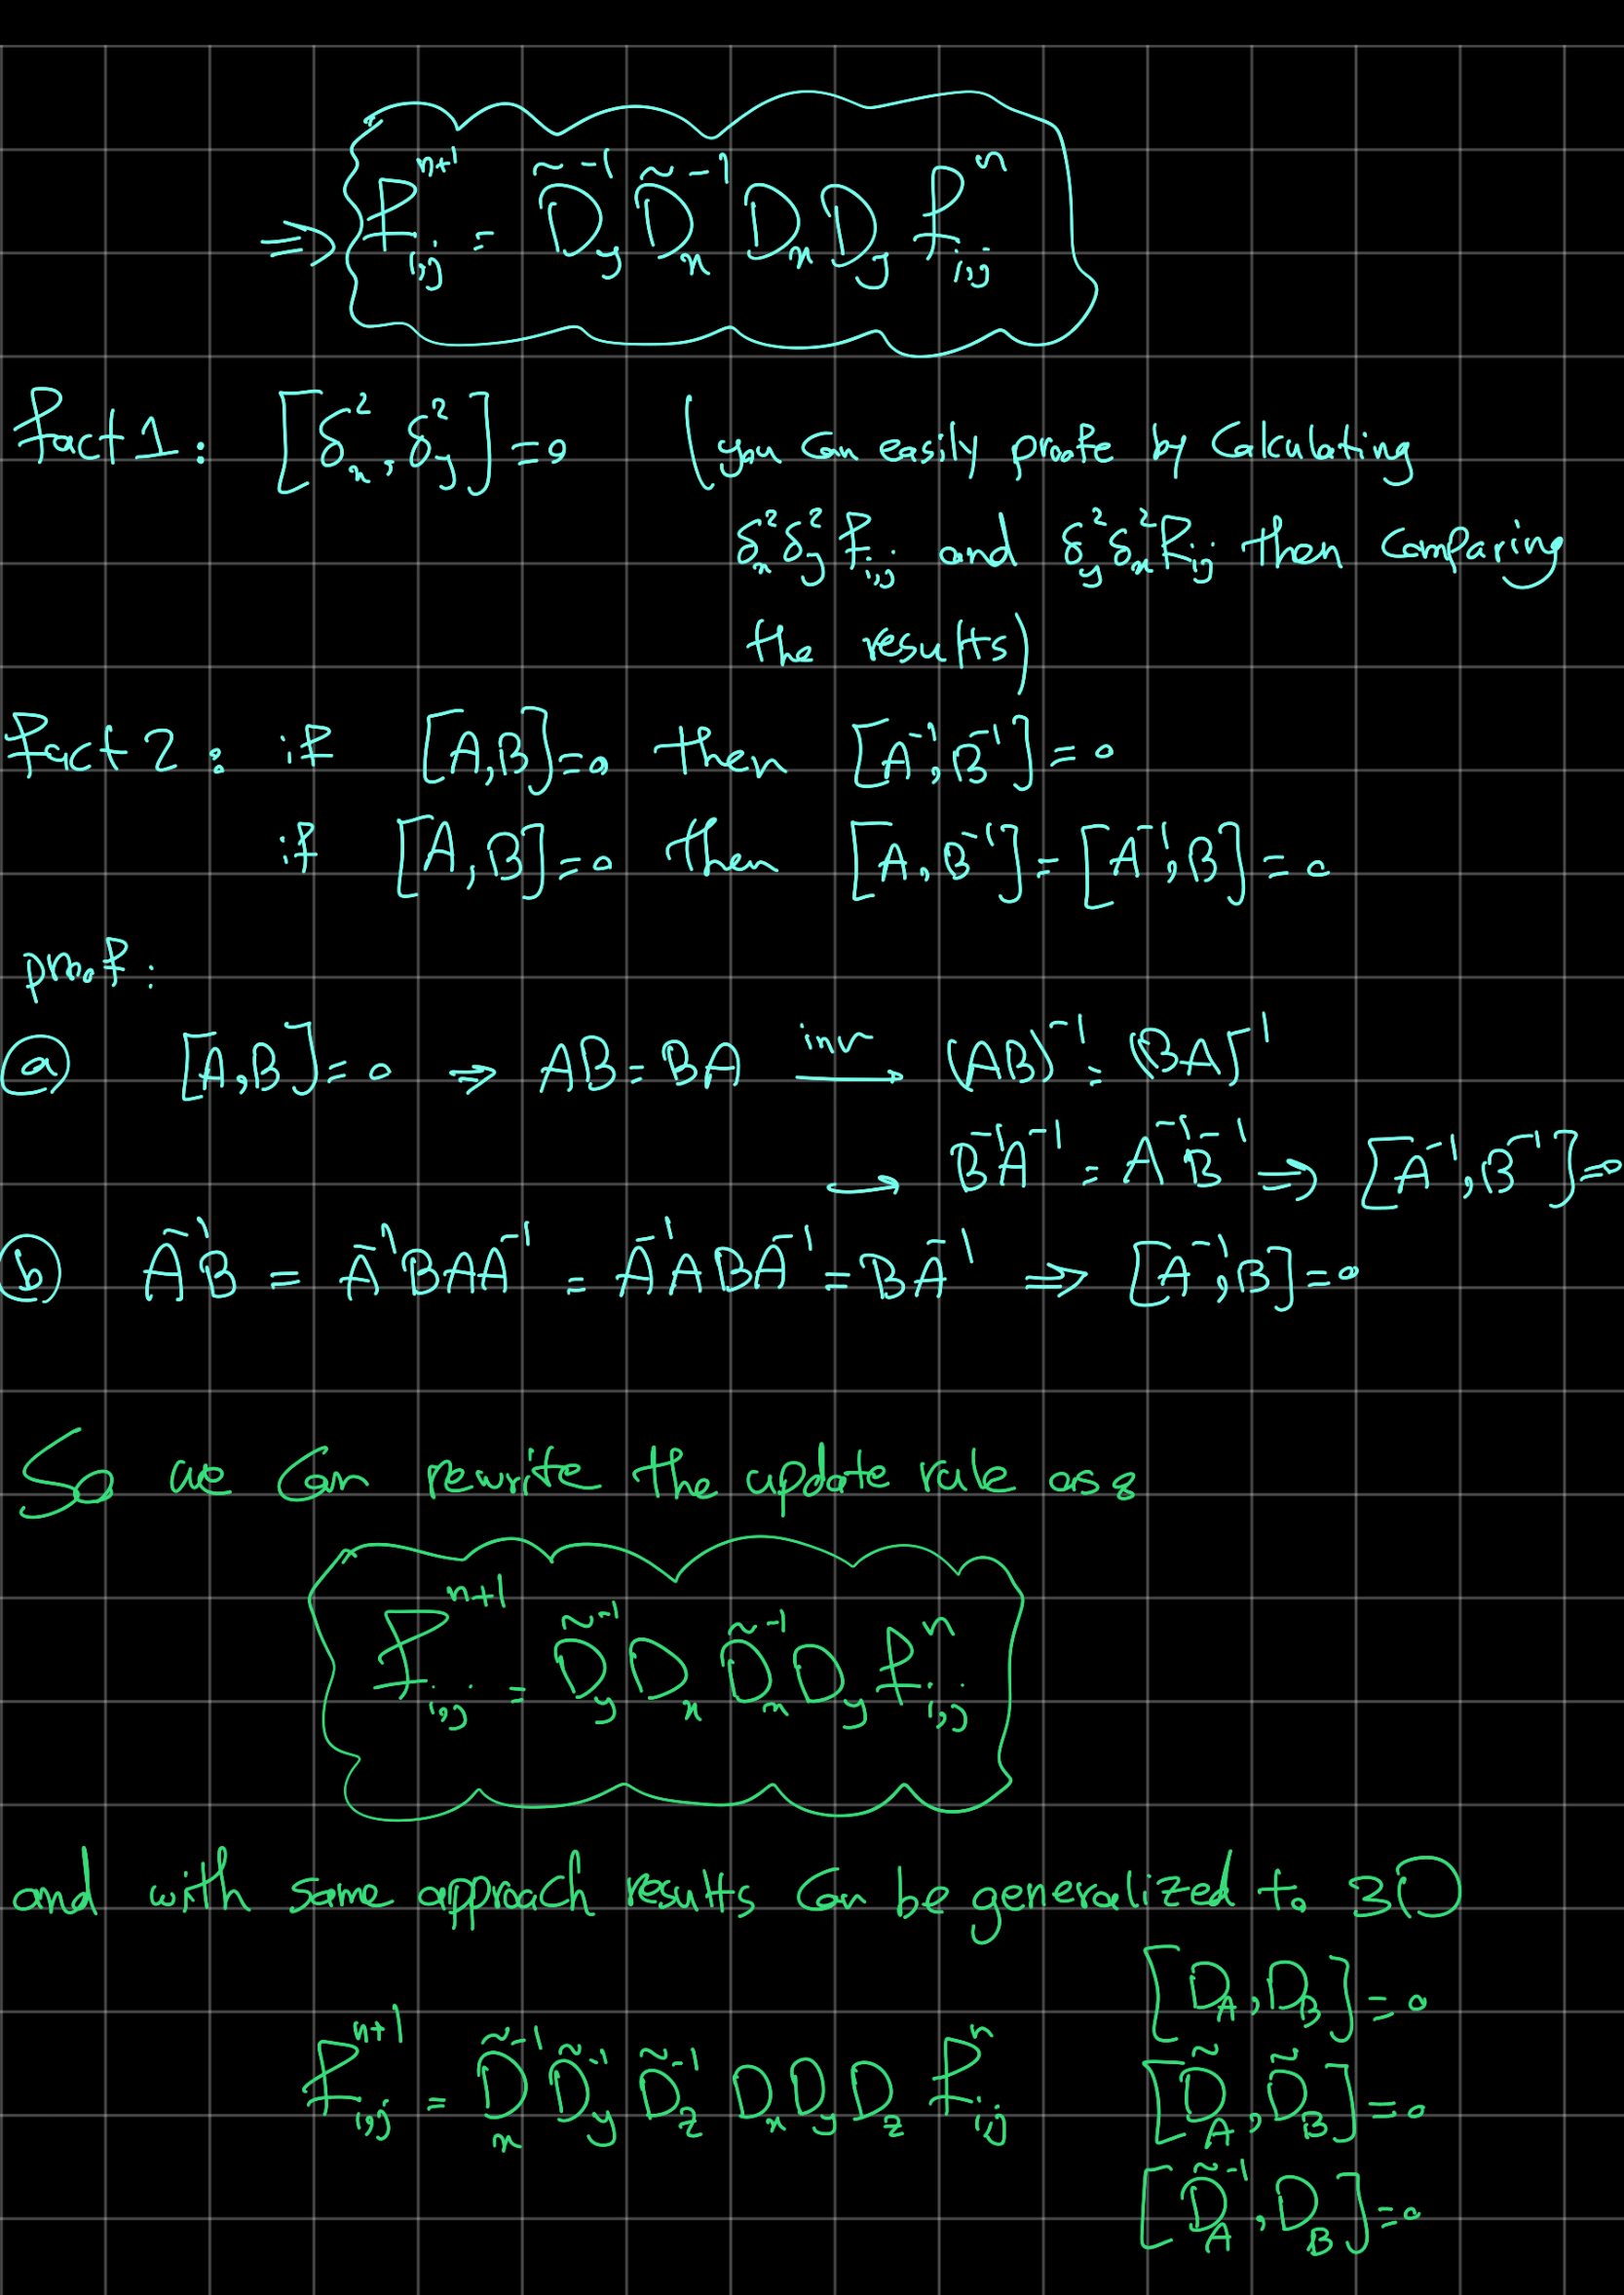

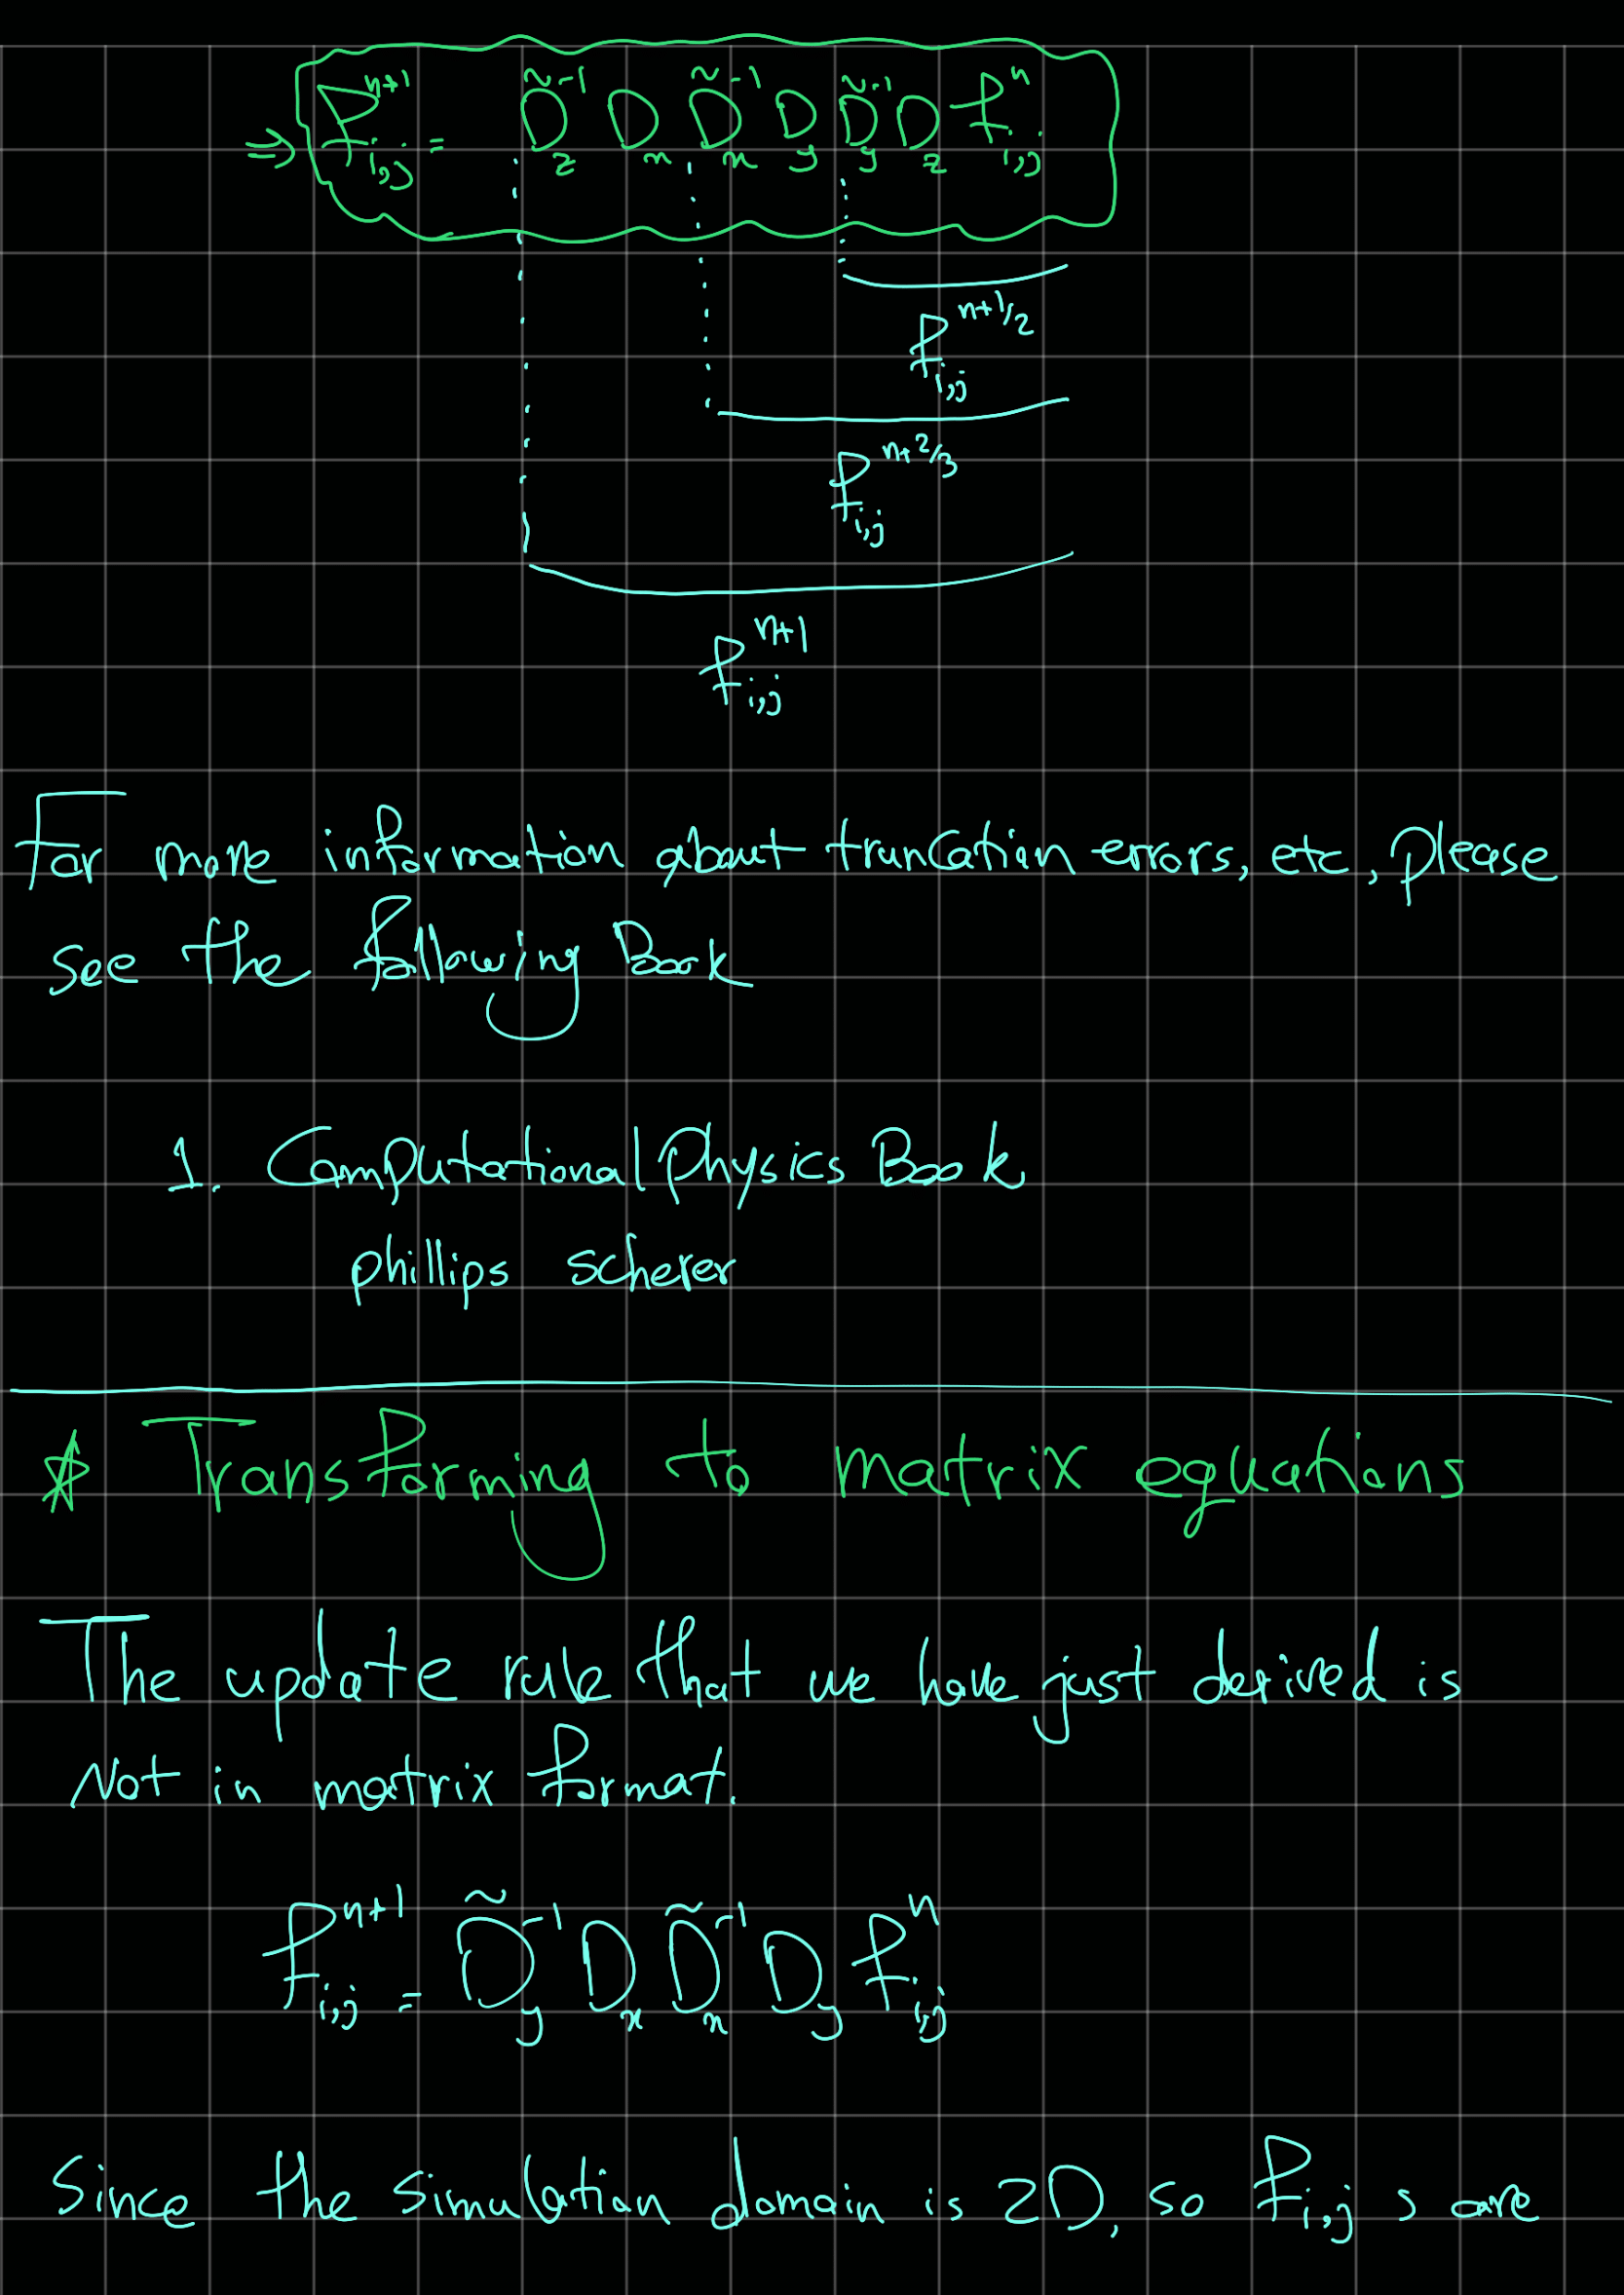

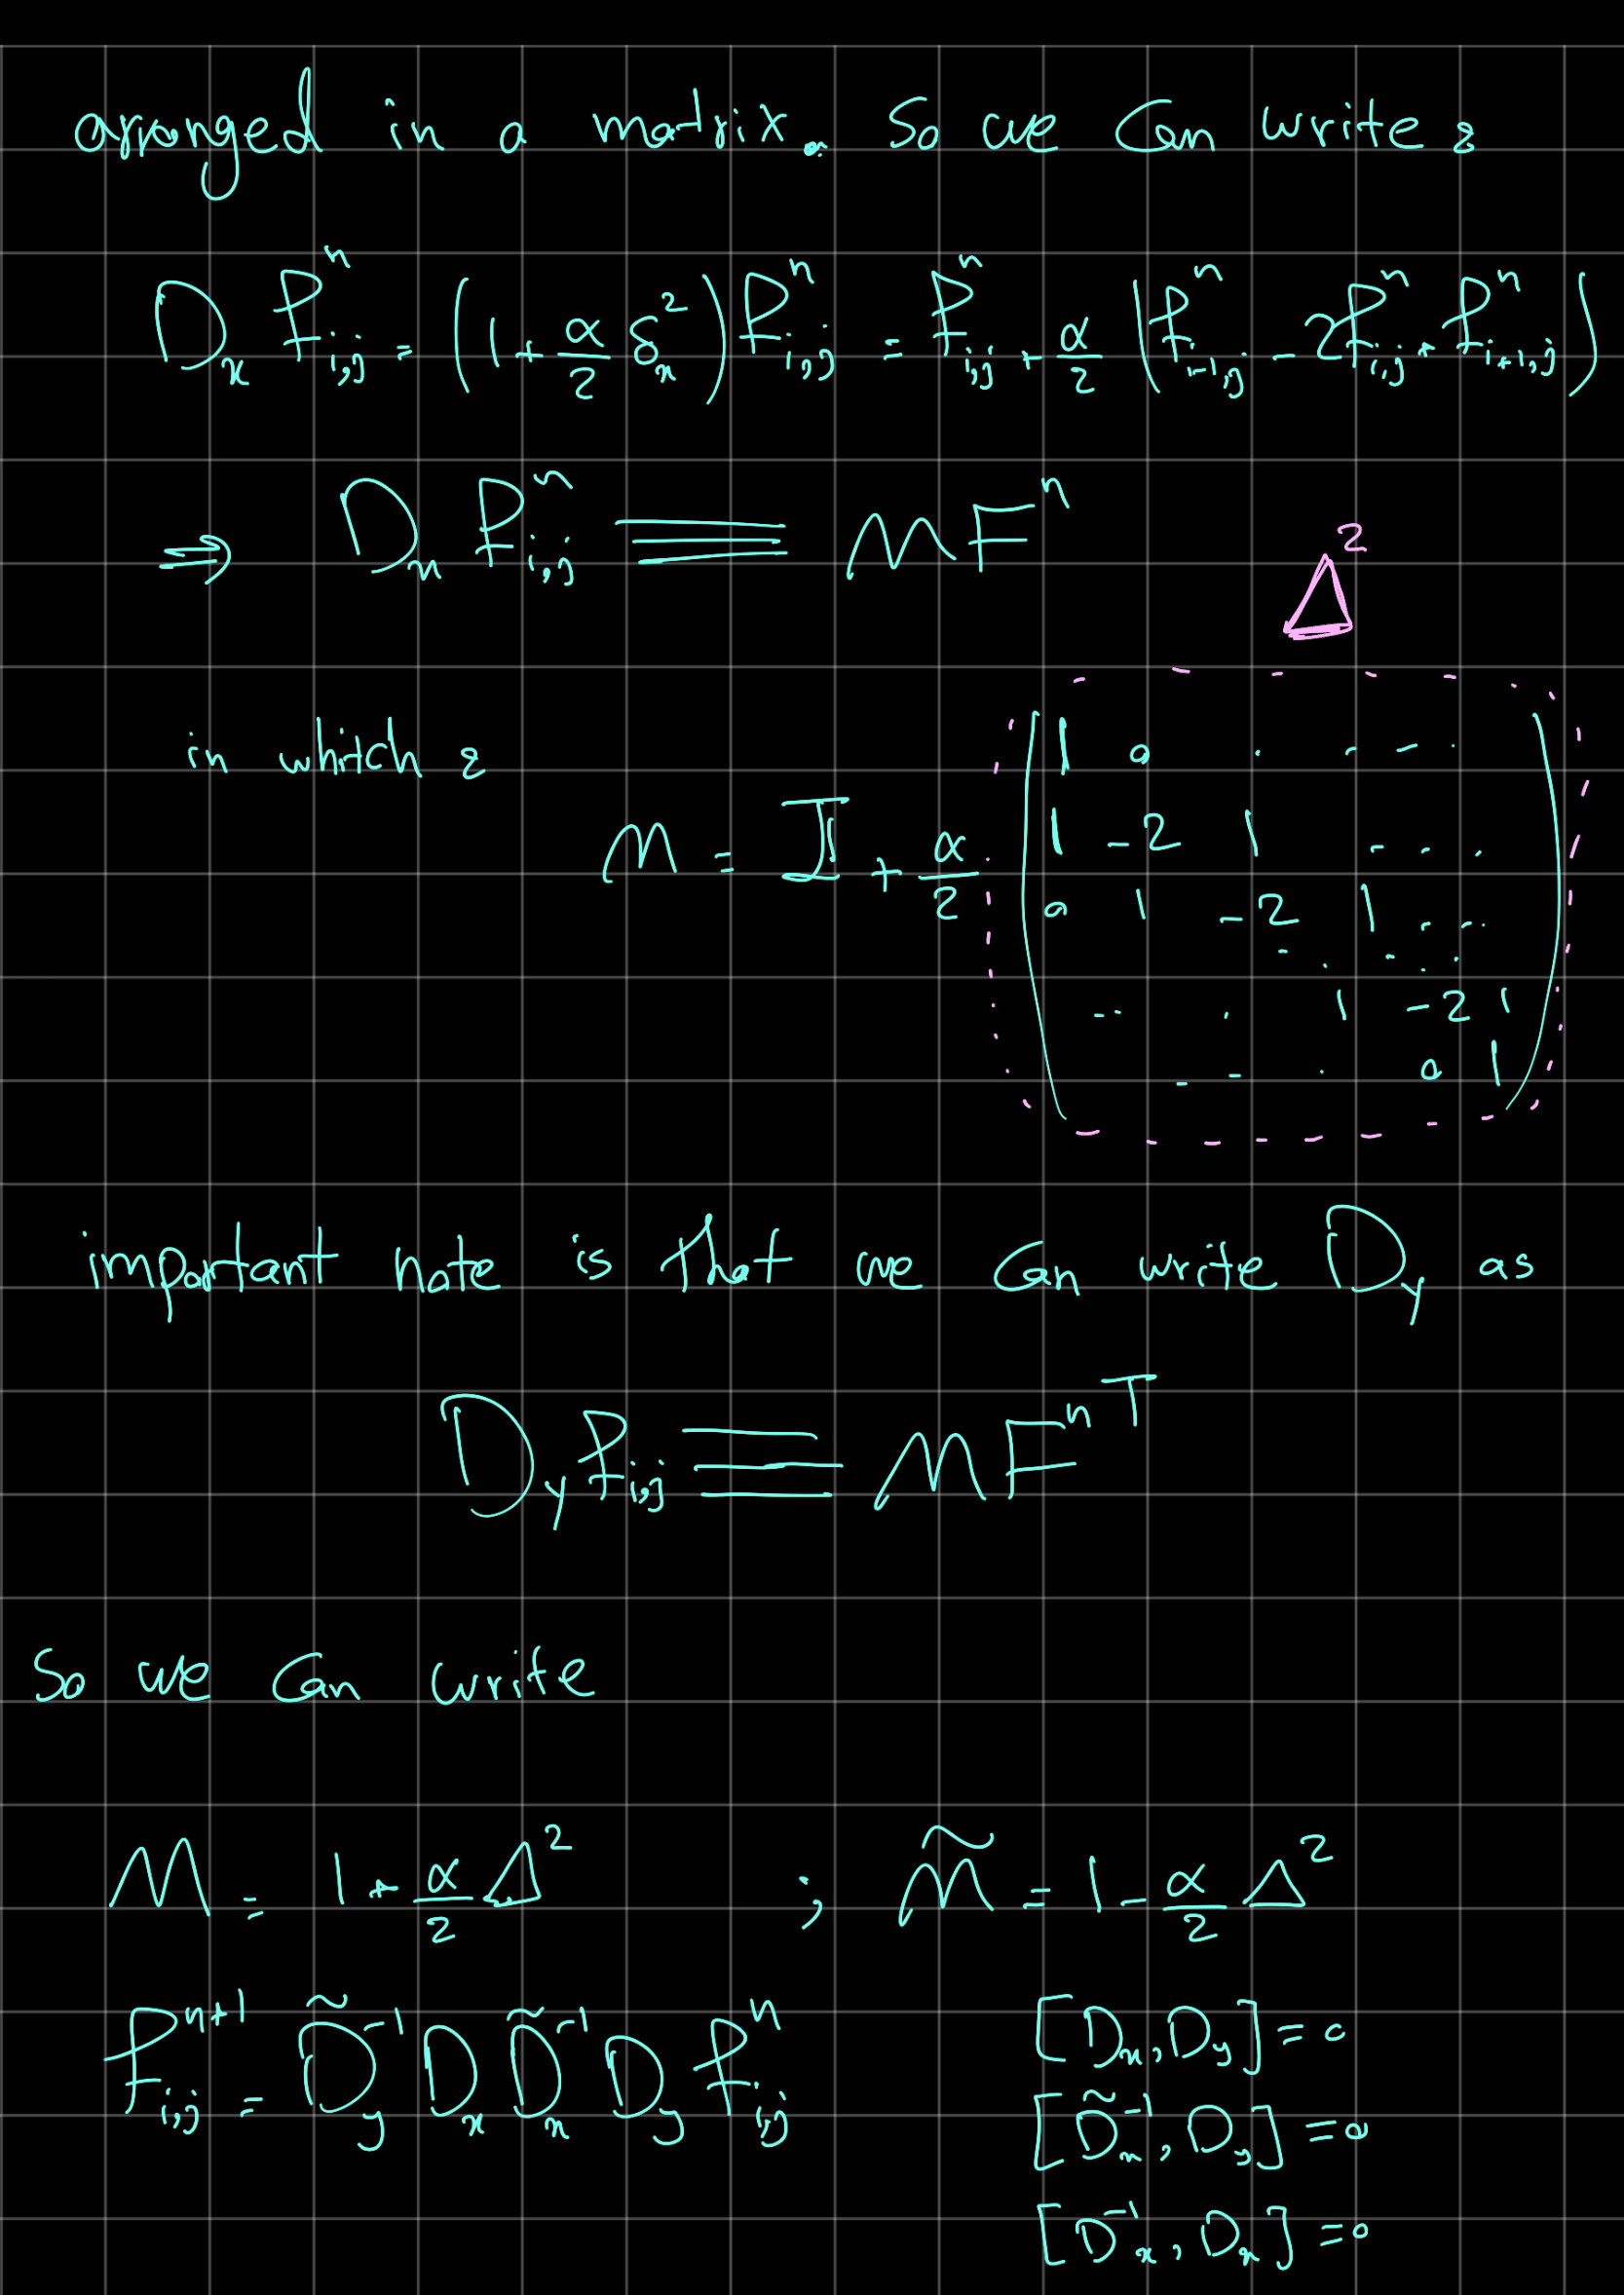

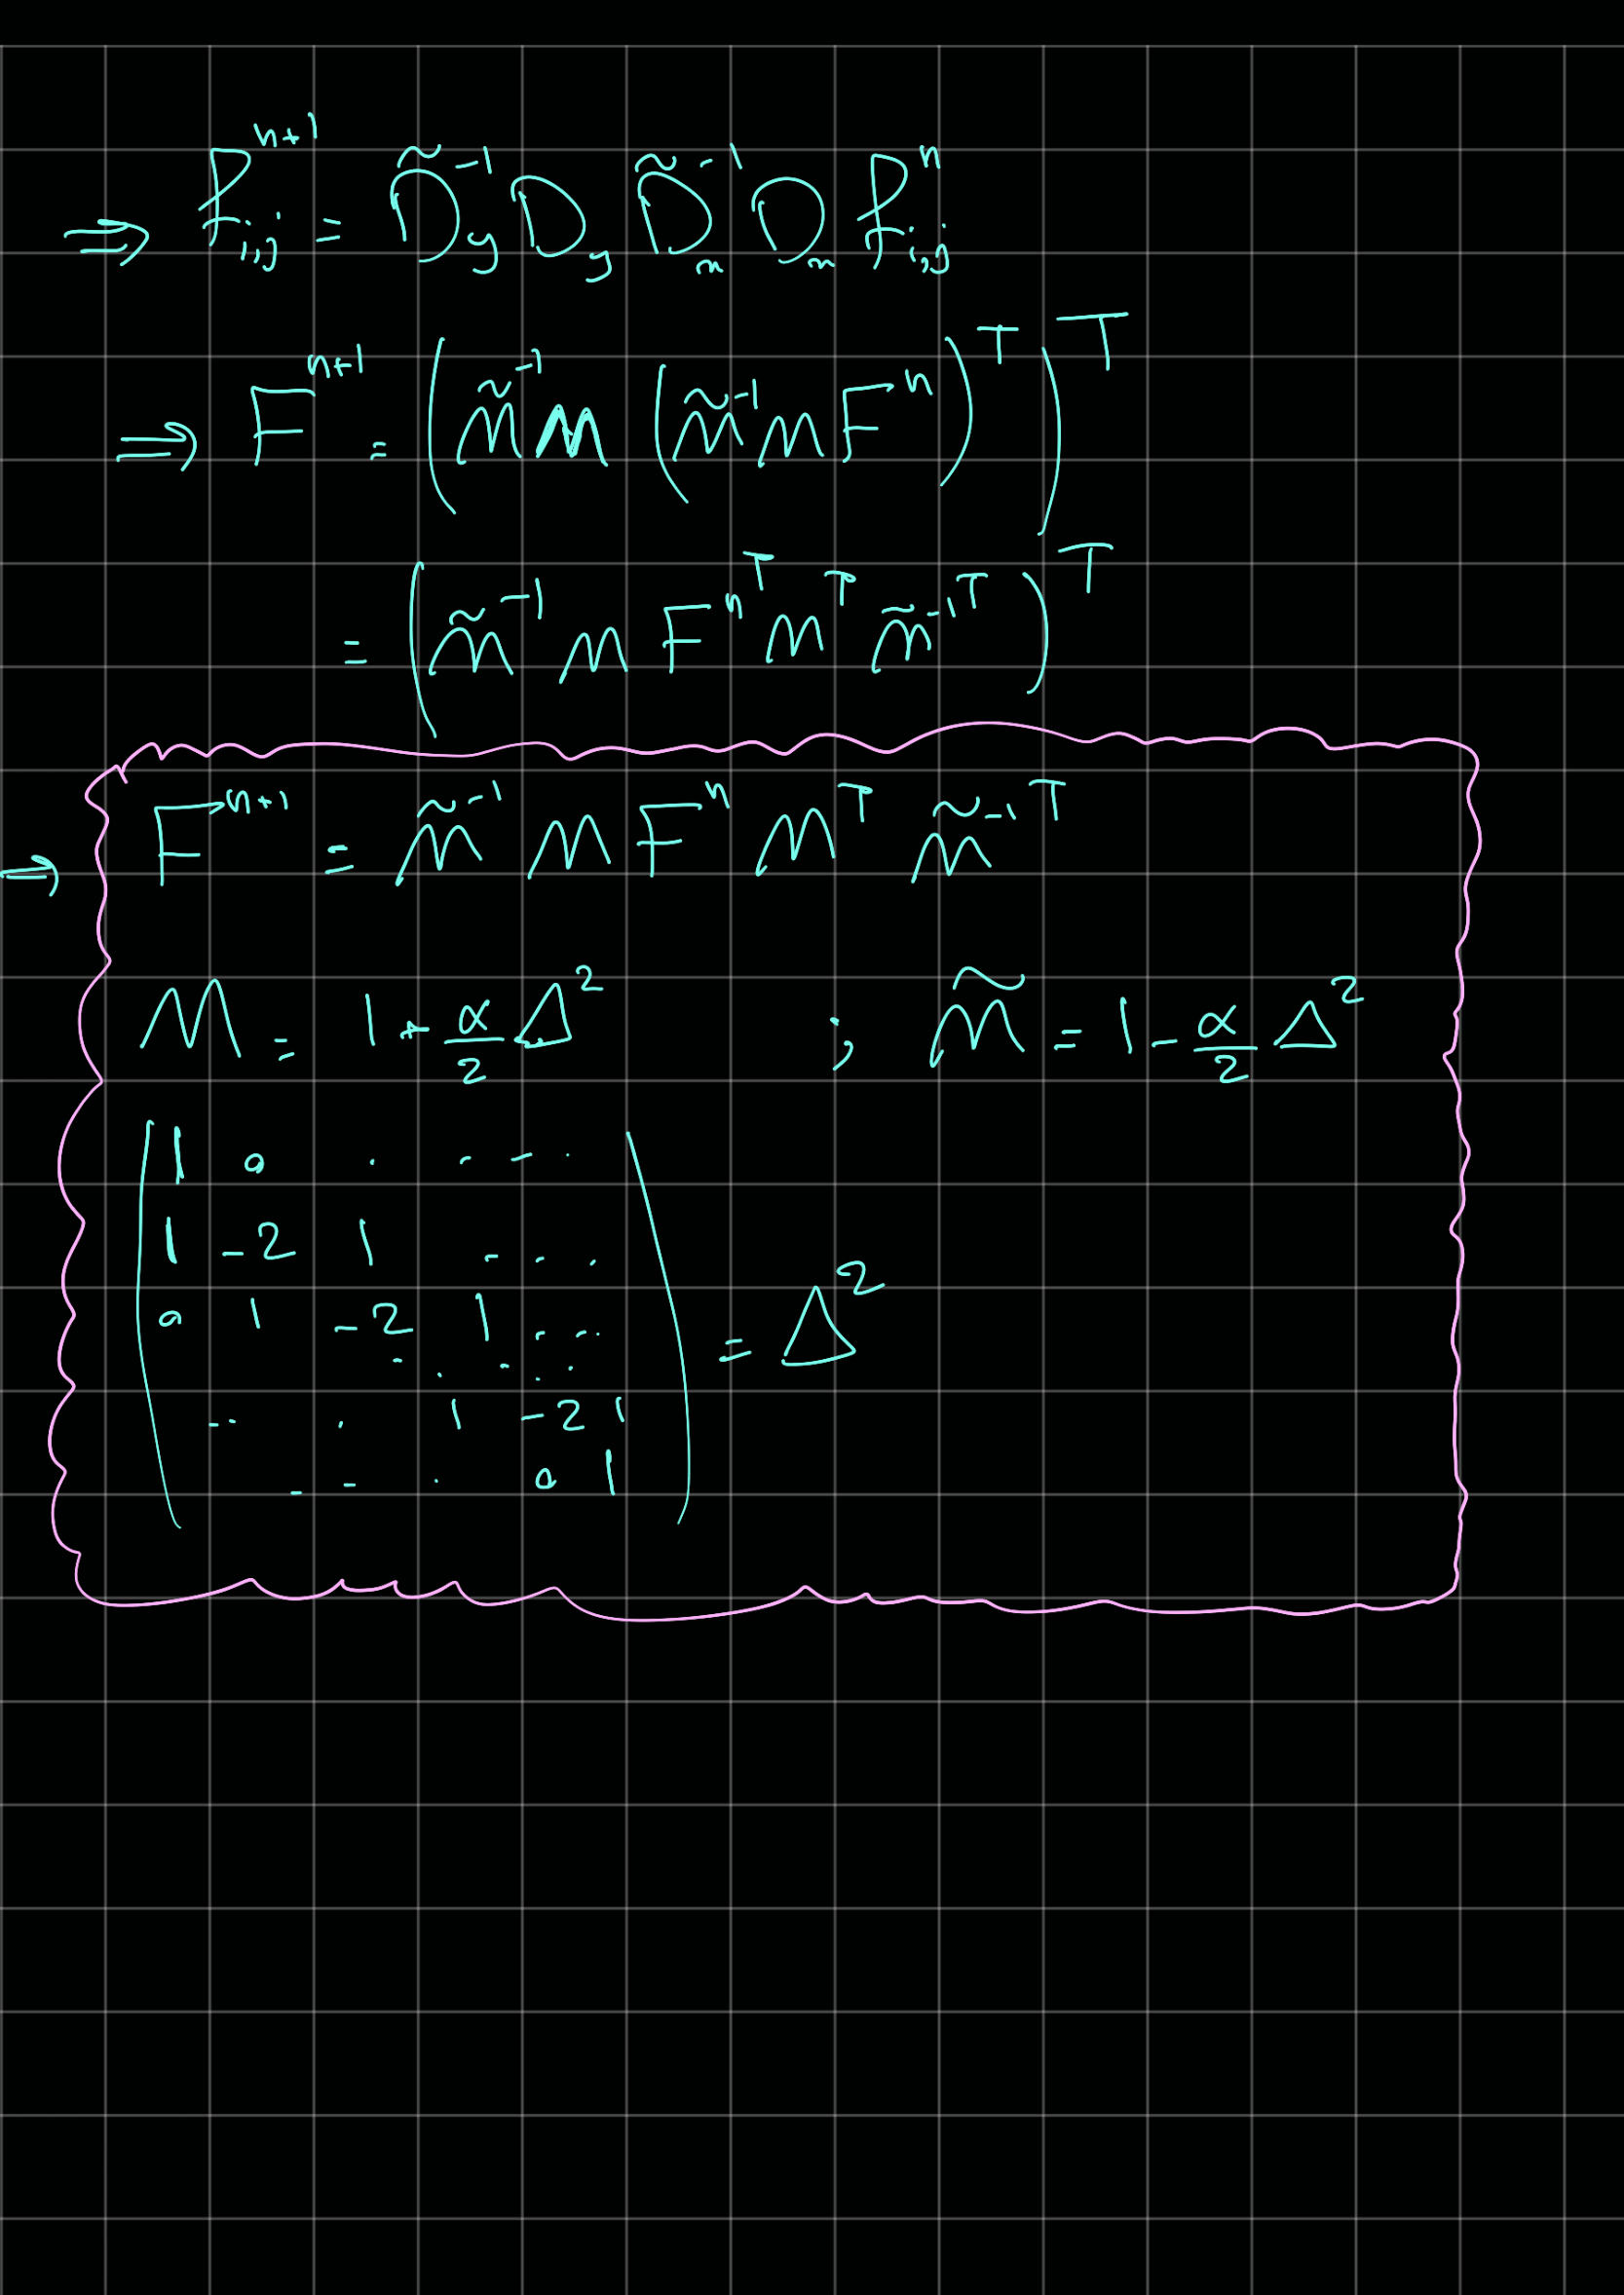

In [ ]:
dx = 1e-2
    dy = dx
    dt = 1e-5
    D = 1
    alpha =  D*dt/dx**2

    tEnd = 0.015
    xEnd = 1
    yEnd = 1

    xList = np.arange(0,xEnd+dx,dx)
    yList = np.arange(0,yEnd+dy,dy)
    X,Y = np.meshgrid(xList, yList)
    tList = np.arange(0,tEnd, dt)
    M = xList.shape[0]
    N = tList.shape[0]
    

In [130]:
def Run_ADI():

    dx = 1e-2
    dy = dx
    dt = 1e-5
    D = 1
    alpha =  D*dt/dx**2

    tEnd = 0.015
    xEnd = 1
    yEnd = 1

    xList = np.arange(0,xEnd+dx,dx)
    yList = np.arange(0,yEnd+dy,dy)
    X,Y = np.meshgrid(xList, yList)
    tList = np.arange(0,tEnd, dt)
    M = xList.shape[0]
    N = tList.shape[0]
    
    F = np.exp(-((X-0.5)**2+(Y-0.5)**2)/(0.1)**2)
    F[:,0] = 0
    F[:,-1] = 0
    F[0,:] = 0
    F[-1,:] = 0

    FData = np.zeros((M,M,N))
    
    upDiag = np.ones(M)
    Diag = np.ones(M)*(-2)
    lowDiag = np.ones(M)

    upDiag[1] = 0
    lowDiag[-2] = 0
    Diag[0] = 1
    Diag[-1] = 1

    delta = spdiags([lowDiag, Diag, upDiag],[-1,0,1],M,M)
    mat = delta.toarray()

    D = scp.sparse.eye(M) + alpha/2 * delta
    D_tilda = scp.sparse.eye(M) - alpha/2 * delta
    
    a = inv(D_tilda)
    b = D
    c = D.T
    d = inv(D_tilda).T

    ab = a.dot(b).toarray()
    cd = c.dot(d).toarray()
    
    for t in range(N):
        FData[:,:,t] = F
        F = ab.dot(F.dot(cd))
        
    return FData

<IPython.core.display.Javascript object>


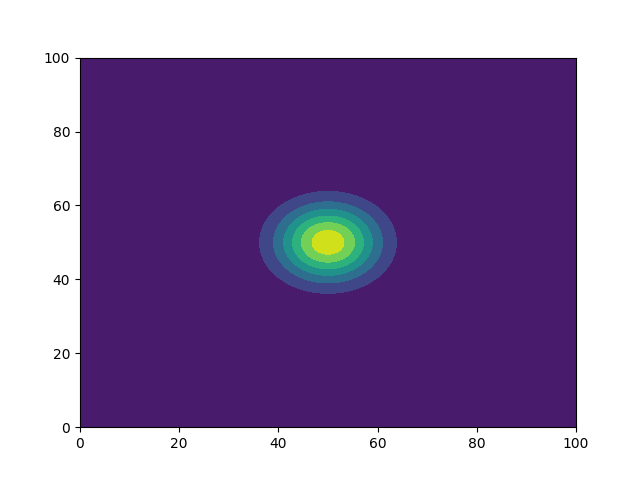

In [126]:
F = np.exp(-((X-0.5)**2+(Y-0.5)**2)/(0.1)**2)
F[:,0] = 0
F[:,-1] = 0
F[0,:] = 0
F[-1,:] = 0

FData = np.zeros((M,M,N))

plt.contourf(F)

In [113]:
upDiag = np.ones(M)
Diag = np.ones(M)*(-2)
lowDiag = np.ones(M)

upDiag[1] = 0
lowDiag[-2] = 0
Diag[0] = 1
Diag[-1] = 1

delta = spdiags([lowDiag, Diag, upDiag],[-1,0,1],M,M)
mat = delta.toarray()
mat

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1., -2.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1., -2., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -2.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1., -2.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

In [114]:
D = scp.sparse.eye(M) + alpha/2 * delta
D_tilda = scp.sparse.eye(M) - alpha/2 * delta

In [115]:
a = inv(D_tilda)
b = D
c = D.T
d = inv(D_tilda).T

ab = a.dot(b).toarray()
cd = c.dot(d).toarray()

In [116]:
for t in range(N):
    FData[:,:,t] = F
    F = ab.dot(F.dot(cd))

In [131]:
FData = Run_ADI()

/home/BCCRC.CA/aparanj/Projects/ComPhysEnv/lib/python3.8/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:318: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
/home/BCCRC.CA/aparanj/Projects/ComPhysEnv/lib/python3.8/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:215: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '


<IPython.core.display.Javascript object>


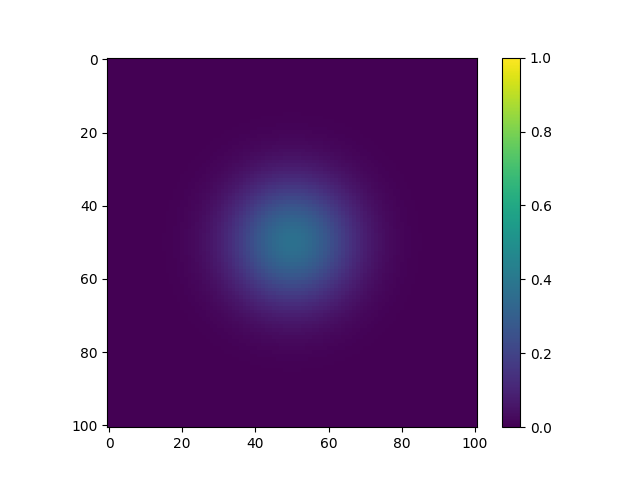

In [144]:
from matplotlib.animation import FuncAnimation
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes()
im=plt.imshow(FData[:,:,0],interpolation='none')
# initialization function: plot the background of each frame
def init():
    im.set_data(FData[:,:,0])
    return [im]

# animation function.  This is called sequentially
def animate(i):
    im.set_array(FData[:,:,i])
    return [im]
anim = FuncAnimation(fig, animate, init_func=init,
                               frames=N, interval=1, blit=True)

plt.colorbar()
#anim.save('diff.gif', writer='imagemagick')

<IPython.core.display.Javascript object>


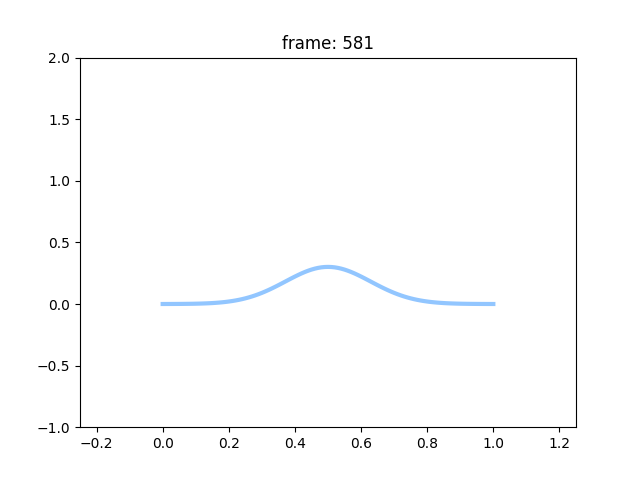

In [145]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')


fig = plt.figure()
ax = plt.axes(xlim=(0, 4), ylim=(-2, 2))
line, = ax.plot([], [], lw=3)

def init():
    line.set_data([], [])
    ax.set_xlim([-0.25,1.25])
    ax.set_ylim([-1,2])
    return line,
def animate(i):
    ydata = FData[:,:,i][50,:]
    xdata = np.linspace(0,1,ydata.shape[0])
    line.set_data(xdata, ydata)
    ax.set_title("frame: {}".format(i))
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=N, interval=1, blit=True)


In [149]:
image = image[:,:300]

In [151]:
image.shape

(300, 300)

## Test on image:

In [ ]:
def rgb2gray(rgb):
        return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])


In [200]:
def Run_ADI_picture():

    dx = 1e-2
    dy = dx
    dt = 1e-4
    D = 1
    alpha =  D*dt/dx**2

    tEnd = 0.2
    xEnd = 1
    yEnd = 1

    xList = np.arange(0,xEnd+dx,dx)
    yList = np.arange(0,yEnd+dy,dy)
    X,Y = np.meshgrid(xList, yList)
    tList = np.arange(0,tEnd, dt)
    M = xList.shape[0]
    N = tList.shape[0]
    
    import matplotlib.image as mpimg


    image = plt.imread('image.jpg')
    image = rgb2gray(image)
    image = image[:,:300]

    

    F = image
    M = F.shape[0]
    
    F[:,0] = 0
    F[:,-1] = 0
    F[0,:] = 0
    F[-1,:] = 0

    FData = np.zeros((M,M,N))
    
    upDiag = np.ones(M)
    Diag = np.ones(M)*(-2)
    lowDiag = np.ones(M)

    upDiag[1] = 0
    lowDiag[-2] = 0
    Diag[0] = 1
    Diag[-1] = 1

    delta = spdiags([lowDiag, Diag, upDiag],[-1,0,1],M,M)
    mat = delta.toarray()

    D = scp.sparse.eye(M) + alpha/2 * delta
    D_tilda = scp.sparse.eye(M) - alpha/2 * delta
    
    a = inv(D_tilda)
    b = D
    c = D.T
    d = inv(D_tilda).T

    ab = a.dot(b).toarray()
    cd = c.dot(d).toarray()
    
    for t in range(N):
        FData[:,:,t] = F
        F = ab.dot(F.dot(cd))
        
    return FData,N

In [201]:
FData,N = Run_ADI_picture()

/home/BCCRC.CA/aparanj/Projects/ComPhysEnv/lib/python3.8/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:318: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
/home/BCCRC.CA/aparanj/Projects/ComPhysEnv/lib/python3.8/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:215: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '


<IPython.core.display.Javascript object>


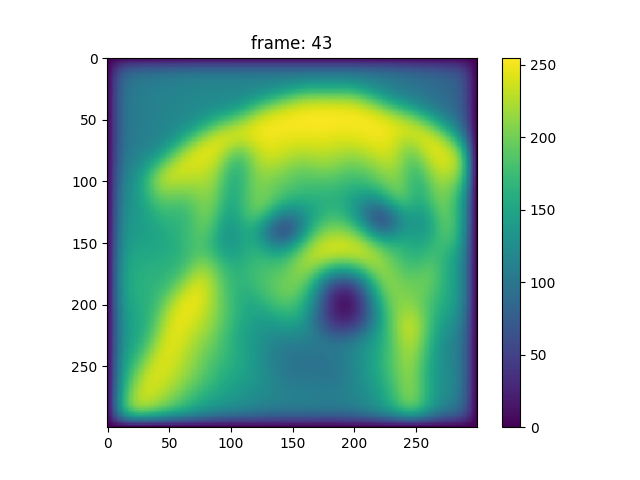

In [206]:
from matplotlib.animation import FuncAnimation
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes()
im=plt.imshow(FData[:,:,0],interpolation='none')
# initialization function: plot the background of each frame
def init():
    im.set_data(FData[:,:,0])
    return [im]

# animation function.  This is called sequentially
def animate(i):
    im.set_array(FData[:,:,i])
    ax.set_title("frame: {}".format(i))
    return [im]
anim = FuncAnimation(fig, animate, init_func=init,
                               frames=N, interval=3, blit=True)

plt.colorbar()
#anim.save('diff.gif', writer='imagemagick')

<IPython.core.display.Javascript object>


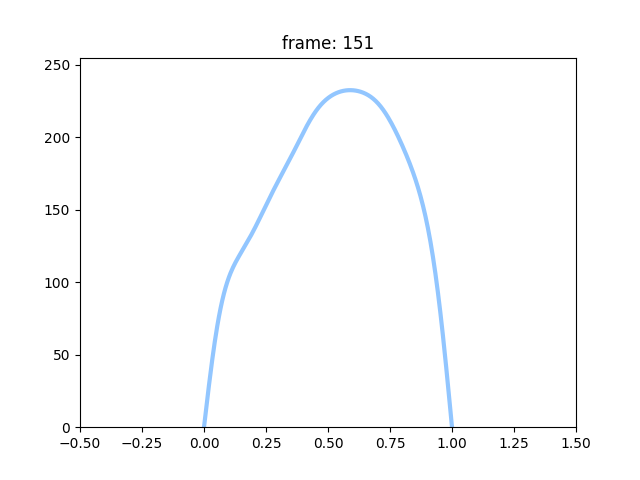

In [208]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')


fig = plt.figure()
ax = plt.axes()
line, = ax.plot([], [], lw=3)

def init():
    line.set_data([], [])
    ax.set_xlim([-0.5,1.5])
    ax.set_ylim([0,255])
    return line,
def animate(i):
    ydata = FData[:,:,i][50,:]
    xdata = np.linspace(0,1,ydata.shape[0])
    line.set_data(xdata, ydata)
    ax.set_title("frame: {}".format(i))
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=N, interval=3, blit=True)


In [161]:
plt.plot(FData[:,:,i][50,:])